# Numerical integration
```{index} Numerical integration
```

Numerical integration involves finding the integral of a function. While [SymPy](https://www.sympy.org/en/index.html) can be used to do analytical integration, there are many functions for which finding an analytical solution to integration is very difficult, and numerical integration is used instead. 

To understand how to perform numerical integration, we first need to understand what exactly is the purpose of integration. For a 1D function, integration means finding the area underneath the curve. However, integration can also be extended for a 2D function and even a 3D function. 

[Quadrature](https://en.wikipedia.org/wiki/Numerical_integration) is the term used for numerical evaluation of a *definite* (i.e. over a range \\([a,b]\\)) integral, or in 1D finding the area under a curve. 

<p style="text-align:center;"><img src="https://upload.wikimedia.org/wikipedia/commons/f/f2/Integral_as_region_under_curve.svg" width="400px"></p>

Source: [Wikipedia](https://upload.wikimedia.org/wikipedia/commons/f/f2/Integral_as_region_under_curve.svg)


```{admonition} Wondered why the symbol of integration looks like this $\int$?
The symbol of integration actually comes from the cursive of capital letter \\(S\\), meaning summation. But why would it come from the idea of summation? Well, integration is very much related to summation. 
```

We know that for a 1D function, which will be our primary topic of discussion today, if we evaluate an integral, we find the area under the function, as illustrated in the figure above. If your curve was a straight line (remember, straight lines are but a subset of curves which has no curves), then it would be rather straightforward to calculate the area under the curve, since you would either have a rectangle if your line was a horizontal straight line, or a trapezoid if your line was not a horizontal straight line. Yet, what happens if your line got a bunch of bend and curves? 

For example, we could have a very simple equation like

\\[f(x) = \sin(x) +5.\\]

This equation is a sinusoidal function, of much more complicated shape that is not as easy to get the area through a rectangle or a trapezoid. Therefore, integration comes in to help you find the area. But how does the integration actually get you the area underneath the curve?

Well, what integration essentially does is basically breaking the area into smaller and smaller parts, evaluating the area of each part, and then summing each small part together. The small part of the area can be approximated to be a rectangle, a trapezoid, or some other weird shape if you find it suitable.

A very simple example, using rectangles are shown below: 

<p style="text-align:center;"><img src="https://upload.wikimedia.org/wikipedia/commons/2/28/Riemann_integral_regular.gif" width="400px"></p>

Source: [Wikipedia](https://upload.wikimedia.org/wikipedia/commons/2/28/Riemann_integral_regular.gif)

```{margin} Note
It should also be noted that although the example shown uses rectangular slices, it is not neccesary to use rectangular slices. It is not even neccessary to use slices that are of the the same width. Even if you used slices with different width, and which are not rectangles, like trapezoids for example, you could still make the slices increasingly thinner so that the summation of the area under the slices comes closer and closer to the area underneath the curve, until the slices become infinitely thin, and the summed area of slices becomes essentially equal to the area under the curve. 
```
As each rectangle slice becomes thinner and thinner, the summed area from the rectangles become more and more closely fitting to the area under the curve. It should be understood that if the rectangle slice becomes infinitely thin, then the summed area from the rectangle would become so close to the area underneath the curve that the two would be essentially the same. You may find the mathematics for the Riemann integral on [Wikipedia](https://en.wikipedia.org/wiki/Riemann_integral). Of course, integration has come a long way since the Riemann integral, and other integrals were developed to deal with the deficiencies with the Riemann integral.

The choice of approximation method, as well as the size of the intervals, will control the error. Better methods as well as smaller (i.e. more to cover our total interval of interest: \\([a,b]\\)) sub-intervals will lead to lower errors, but will generally cost more to compute.

Here the following quadrature methods will be covered in the context of a simple function:

* Midpoint rule (also known as the rectangle method)
* Trapezoid rule
* Simpson's rule
* Composite Simpson's rule
* Weddle's rule.

## Example

Let's begin with a simple function to demonstrate some of the most basic methods for performing numerical integration:

\\[f\left ( x \right ) := \sin \left ( x \right ),\\]

and assume that we want to know what the area under the, \\(\sin\\) function between 0 and \\(\pi\\), i.e. \\([a,b]=[0,\pi]\\).

The indefinite integral (or anti-derivative) of \\(\sin \left ( x \right )\\) is of course \\(-\cos \left ( x \right )\\) (plus a constant of integration, \\(C\\), which we can simply ignore as we saw above as it drops out as soon as we perform a *definite* integral).

Since we know the indefinite integral exactly in this case, we can perform the definite integration (i.e. find the area under the curve) ourselves exactly by hand:

\\[I :=  \int_{0}^{\pi} \sin \left ( x \right ) = \left [ -\cos\left ( x \right )+ C \right ]_{0}^{\pi} =-\cos\left ( \pi \right ) - (-\cos\left ( 0 \right )) =-\cos\left ( \pi \right ) + \cos\left ( 0 \right ) = -(-1) + 1 = 2.\\]

We included the constant \\(C\\) here to just to emphasise again the fact that it's present doesn't matter - we can just not write it down in this type of expression.

Let's start by plotting the function between these points.

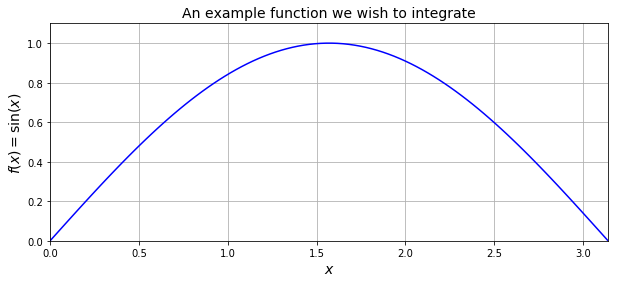

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Set up the figure
fig = plt.figure(figsize=(10, 4))
ax1 = plt.subplot(111)

# Get the value of pi from numpy and generate 100 equally spaced values from 0 to pi.
x = np.linspace(0, np.pi, 100)

# Calculate sin at these points.
y = np.sin(x)

# plot
ax1.plot(x, y, 'b')

# Set x axis limits between 0 and pi.
ax1.set_xlim([0, np.pi])
ax1.set_ylim([0, 1.1])

# Label axis.
ax1.set_xlabel('$x$', fontsize=14)
ax1.set_ylabel('$f(x)=\sin(x)$', fontsize=14)
ax1.set_title('An example function we wish to integrate', fontsize=14)

# Overlay a grid.
ax1.grid(True)

plt.show()

## Midpoint rule (rectangle method)

The **midpoint rule** is perhaps the simplest quadrature rule. For reasons you will see below it is sometimes also called the **rectangle method**.

Consider one of the subintervals \\([x_i, x_{i+1}]\\). The midpoint rule approximates the integral over this (the \\(i\\)-th) subinterval by the area of a rectangle, with a base of length \\((x_{i+1}-x_i)\\) and a height given by the value of \\(f(x)\\) at the midpoint of that interval (i.e. at \\(x=(x_{i+1}+x_i)/2\\)):

\\[ I_M^{(i)} := (x_{i+1}-x_i) \times f \left ( \frac {x_{i+1}+x_i} {2} \right ), \quad\text{for}
\quad 0\le i \le n-1.\\]

The midpoint estimate of \\(I\\) then simply involves summing up over all the subintervals:

\\[I_M := \sum_{i=0}^{n-1} \, f \left ( \frac {x_{i+1}+x_i} {2} \right )\, (x_{i+1}-x_i).\\]

Midpoint rule:

1. Divide the interval you want to calculate the area under the curve for into smaller pieces, each will be called a subinterval.

2. Assume that the interval begins at \\(x_0\\) and ends at \\(x_n\\). We can pick a random subinterval \\([x_i,x_{i+1}]\\) where \\(0\le i \le n-1\\). For example, your 1st interval will be \\([x_0,x_1]\\) and your $i=0$, and your last interval will be \\([x_{n-1},x_n]\\) and your \\(i=n-1\\). 

3. For every subinterval, we approxiamte the slice to be a rectangle. To find the area of the rectangle we need to find the width and the height. The width of the rectangle is simply the width of the subinterval. The height of the rectangle can be estimated as the value of the function at the midpoint of the subinterval, so \\(f \left ( \frac {x_{i+1}+x_i} {2} \right )\\). To find the area we simply multiply the width of the rectangle by the height of the rectangle. 

    Width of the rectangle:

    \\[ x_{i+1} - x_i.\\]

    Height of the rectangle:

    \\[f \left ( \frac {x_{i+1}+x_i} {2} \right ).\\]

    Area of the rectangle:

    \\[(x_{i+1} - x_i) f \left ( \frac {x_{i+1}+x_i} {2} \right ).\\]

    Generalizing the above for all slices, where \\(I_M^{(i)}\\) is simply the area of the subinterval \\([x_i,x_{i+1}]\\). \\(M\\) subscript here denotes the use of the midpoint method. 

    \\[ I_M^{(i)} := (x_{i+1}-x_i) \times f \left ( \frac {x_{i+1}+x_i} {2} \right ), \quad\text{for}
\quad 0\le i \le n-1.\\]

4. To find the area under the curve, we need to sum up all of the areas from the subinterval, so we are going to use the summation symbol. We know that the subinterval index goes from the first subinterval where \\(i=0\\) to the last subinterval where \\(i=n-1\\), thus we arrive at

\\[I_M := \sum_{i=0}^{n-1} f \left ( \frac {x_{i+1}+x_i} {2} \right ) (x_{i+1}-x_i).\\]

Note that we dropped \\(i\\) prefix from \\(I\\) because now it is the whole area under the curve, not just the area from one subinterval. 

Let's write some code to plot the idea as well as compute an estimate of the integral using the midpoint rule.

In [69]:
# this is a matplotlib function that allows us to easily plot rectangles
# which will be useful for visualising what the midpoint rule does
from matplotlib.patches import Rectangle

def f(x):
    """The function we wish to integrate"""
    return np.sin(x)

# Get the value of pi from numpy and generate equally spaced values from 0 to pi.
x = np.linspace(0, np.pi, 100)
y = f(x)

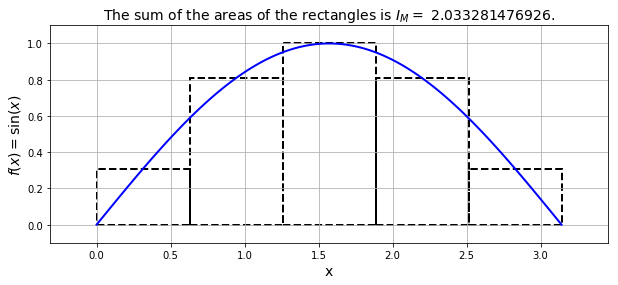

In [70]:
# Plot
fig = plt.figure(figsize=(10, 4))
ax1 = plt.subplot(111)
ax1.plot(x, y, 'b', lw=2)

ax1.margins(0.1)

# Label axis.
ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('$f(x)=\sin(x)$', fontsize=14)

# Overlay a grid.
ax1.grid(True)

number_intervals = 5
xi = np.linspace(0, np.pi, number_intervals+1)
I_M = 0.0
for i in range(number_intervals):
    ax1.add_patch(Rectangle((xi[i], 0.0), (xi[i+1] - xi[i]),
                            f((xi[i+1]+xi[i])/2), fill=False, ls='--', color='k', lw=2))
    I_M += f((xi[i+1]+xi[i])/2)*(xi[i+1] - xi[i])

ax1.set_title('The sum of the areas of the rectangles is $I_M =$ {:.12f}.'.format(I_M),
              fontsize=14)

    
plt.show()

A more complex example is shown below, where the red line shows the original function we wish to compute the integral of, and the blue rectangles *approximate* the area under that function for a number of sub-intervals:

<p style="text-align:center;"><img src="http://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Integration_rectangle.svg/340px-Integration_rectangle.svg.png" width="600px"></p>

### Implementation
```{margin} Note
Note that the SciPy module features many different integration functions, and you can find thorough documentation for these functions (including methods not covered in this course) [here](http://docs.scipy.org/doc/scipy/reference/integrate.html). This library does not contain a function for the midpoint rule, but it is trivial to create our own.
```

Clearly the sum of the areas of all the rectangles provides an estimate of the true integral. In the case above we observe an error of around 1.5%.

As we are going to compare different rules below, let's implement a midpoint rule function.

In [71]:
def midpoint_rule(a, b, function, number_intervals=10):
    """ Our implementation of the midpoint quadrature rule.
    
    a and b are the end points for our interval of interest.
    
    'function' is the function of x \in [a,b] which we can evaluate as needed.
    
    number_intervals is the number of subintervals/bins we split [a,b] into.
    
    Returns the integral of function(x) over [a,b].
    """
    interval_size = (b - a)/number_intervals

    # Some examples of some asserts which might be useful here - 
    # you should get into the habit of using these sorts of checks as much as is possible/sensible.
    assert interval_size > 0
    assert type(number_intervals) == int
    
    # Initialise to zero the variable that will contain the cumulative sum of all the areas
    I_M = 0.0
    
    # Find the first midpoint -- i.e. the centre point of the base of the first rectangle
    mid = a + (interval_size/2.0)
    # and loop until we get past b, creating and summing the area of each rectangle
    while (mid < b):
        # Find the area of the current rectangle and add it to the running total
        # this involves an evaluation of the function at the subinterval midpoint
        I_M += interval_size * function(mid)
        # Move the midpoint up to the next centre of the interval
        mid += interval_size

    # Return our running total result
    return I_M

In [72]:
# Check the function runs if it agrees with our first
# version used to generate the schematic plot of the method above:
print('midpoint_rule(0, np.pi, np.sin, number_intervals=5) = ',
      midpoint_rule(0, np.pi, np.sin, number_intervals=5))

midpoint_rule(0, np.pi, np.sin, number_intervals=5) =  2.033281476926104


Now let's test the midpoint function:

In [73]:
print("The exact area found by direct integration = 2")

for i in (1, 2, 10, 100, 1000):
    area = midpoint_rule(0, np.pi, np.sin, i)
    print("Area %g rectangle(s) = %g (error=%g)"%(i, area, abs(area-2)))

The exact area found by direct integration = 2
Area 1 rectangle(s) = 3.14159 (error=1.14159)
Area 2 rectangle(s) = 2.22144 (error=0.221441)
Area 10 rectangle(s) = 2.00825 (error=0.00824841)
Area 100 rectangle(s) = 2.00008 (error=8.22491e-05)
Area 1000 rectangle(s) = 2 (error=8.22467e-07)


````{admonition} Exercise
:class: dropdown, tip 

Create a log-log plot of error egainst the number of subintervals:

```python
# Create a list of interval sizes to test 
interval_sizes_M = [1, 2, 4, 8, 16, 32, 100, 1000]

# Initialise an array to store the errors
errors_M = np.zeros_like(interval_sizes_M, dtype='float64')

# Loop over the list of interval sizes, compute and store errors
for (i, number_intervals) in enumerate(interval_sizes_M):
    area = midpoint_rule(0, np.pi, f, number_intervals)
    errors_M[i] = abs(area-2)

# Plot how the errors vary with interval size
fig = plt.figure(figsize=(5, 5))
ax1 = plt.subplot(111)
ax1.loglog(interval_sizes_M, errors_M, 'bo-', lw=2)
ax1.set_xlabel('log(no. of intervals)', fontsize=16)
ax1.set_ylabel('log(error)', fontsize=16)
ax1.set_title('Convergence plot for $\sin$ integration\nwith the midpoint rule',
              fontsize=16)

from myst_nb import glue
glue("midpoint_conv_fig", fig, display=False)

plt.show()

```

```{glue:} midpoint_conv_fig
```

````

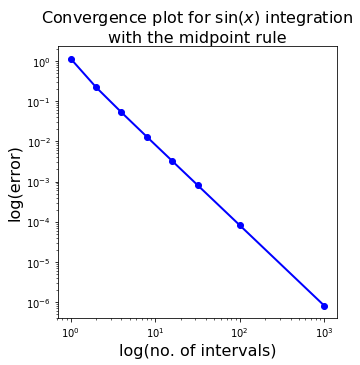

In [74]:
# Create a list of interval sizes to test 
interval_sizes_M = [1, 2, 4, 8, 16, 32, 100, 1000]

# Initialise an array to store the errors
errors_M = np.zeros_like(interval_sizes_M, dtype='float64')

# Loop over the list of interval sizes, compute and store errors
for (i, number_intervals) in enumerate(interval_sizes_M):
    area = midpoint_rule(0, np.pi, f, number_intervals)
    errors_M[i] = abs(area-2)

# Plot how the errors vary with interval size
fig = plt.figure(figsize=(5, 5))
ax1 = plt.subplot(111)
ax1.loglog(interval_sizes_M, errors_M, 'bo-', lw=2)
ax1.set_xlabel('log(no. of intervals)', fontsize=16)
ax1.set_ylabel('log(error)', fontsize=16)
ax1.set_title('Convergence plot for $\sin(x)$ integration\nwith the midpoint rule',
              fontsize=16)

from myst_nb import glue
glue("midpoint_conv_fig", fig, display=False)

plt.show()

**Observations:**

* With one rectangle, we are simply finding the area of a box of shape \\(\pi \times 1\\), where \\(\pi\\) is the width of the rectangle and \\(1\\) is the value of the function evaluated at the midpoint, \\(\pi/2\\). So of course the result is \\(\pi\\).

* As we increase the number of subintervals, or rectangles, we increase the accuracy of our area. We can observe from the slope of the log-log plot of error against number of subintervals that the error is a quadratic function of the inverse of the number of subintervals (or equivalently is quadratically dependent on the spacing between the points - the interval size). This demonstrates that (for this particular example at least), the method demonstrates second-order accuracy - if we halve the interval size the error goes down by a factor of 4!

* The simplicity of this method is its weakness, as rectangles (i.e. a flat top) are rarely a good approximation for the shape of a smooth function.

* We want to use as few shapes as possible to approximate our function, because each additional rectangle is one extra time round the loop, which includes its own operations as well as an extra evaluation of the function, and hence increases the overall computational cost.

## Trapezoid rule

As previously stated, the slices we use do not have to be rectangles, they can also be trapezoids. Rectangle rule is very similar to the **trapezoid rule** except for one small difference. 

For the trapezoid rule, the width of the subinterval will be multiplied by 

\\[\frac{f(x_i) + f(x_{i+1})}{2}.\\]

For the trapezoid rule, the subscipt we will use the subscript \\(T\\). If we change the shape of the rectangle to a trapezoid (i.e. the top of the shape now being a linear line fit defined by the values of the function at the two end points of the subinterval, rather than the constant value used in the midpoint rule), we arrive at the trapezoid, or trapezoidal rule. 

The trapezoid rule approximates the integral by the area of a trapezoid with base \\((x_{i+1}-x_i)\\) and the left- and right-hand-sides equal to the values of the function at the two end points.  

In this case the area of the shape approximating the integral over one subinterval, is given by:

\\[I_T^{(i)} := (x_{i+1}-x_i) \times
\left( \frac {f\left ( x_{i+1}\right ) + f \left (x_{i} \right )} {2} \right)
\quad\text{for}
\quad 0\le i \le n-1.\\]

The trapezoidal estimate of \\(I\\) then simply involves summing up over all the subintervals:

\\[I_T := \sum_{i=0}^{n-1}\left(\frac{f(x_{i+1}) + f(x_{i})}{2}\right )(x_{i+1}-x_i).\\]

Let's write some code to plot the idea and compute an estimate of the integral.

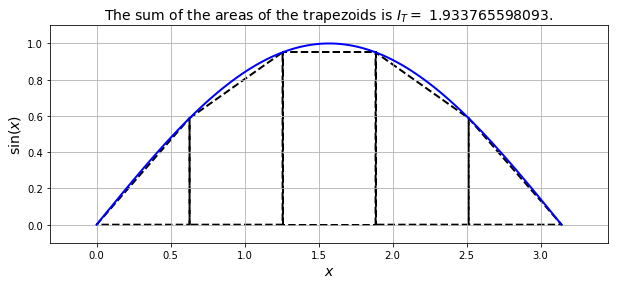

In [75]:
# This is a matplotlib function that allows us to plot polygons
from matplotlib.patches import Polygon

# Get the value of pi from numpy and 
# generate equally spaced values from 0 to pi.
x = np.linspace(0, np.pi, 100)
y = f(x)

# plot
fig = plt.figure(figsize=(10, 4))
ax1 = plt.subplot(111)
ax1.plot(x, y, 'b', lw=2)

ax1.margins(0.1)

# Label axis.
ax1.set_xlabel('$x$', fontsize=14)
ax1.set_ylabel('$\sin(x)$', fontsize=14)
ax1.set_title('Approximating function with trapezoids', fontsize=14)

# Overlay a grid.
ax1.grid(True)

number_intervals = 5
xi = np.linspace(0, np.pi, number_intervals+1)
I_T = 0.0
for i in range(number_intervals):
    ax1.add_patch(Polygon(np.array([[xi[i], 0], [xi[i], f(xi[i])], [
                  xi[i+1], f(xi[i+1])], [xi[i+1], 0]]), closed=True, fill=False, ls='--', color='k', lw=2))
    I_T += ((f(xi[i+1]) + f(xi[i]))/2)*(xi[i+1] - xi[i])

    
ax1.set_title('The sum of the areas of the trapezoids is $I_T =$ {:.12f}.'.format(I_T),
              fontsize=14)

    
plt.show()

For our pictorial example used above, the approximation looks like it should be more accurate than the midpoint rule:

<p style="text-align:center;"><img src="http://upload.wikimedia.org/wikipedia/commons/thumb/0/03/Integration_trapezoid.svg/340px-Integration_trapezoid.svg.png" width="600px"></p>

The tops of the shapes (now trapezoids) are approximating the variation of the function with a linear function, rather than a flat (constant) function. This looks like it should give more accurate results, but see below.

Note that numpy has a function for the trapezoid rule, [`numpy.trapz`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.trapz.html), but we'll make our own that works in a similar way to our midpoint rule function.

In [76]:
def trapezoidal_rule(a, b, function, number_intervals=10):
    """Our implementation of the trapezoidal quadrature rule.
    
    Note that as discussed in the lecture this version of the implementation 
    performs redundant function evaluations - see the composite implementation 
    in the homework for a more efficient version.
    """
    interval_size = (b - a)/number_intervals

    assert interval_size > 0
    assert type(number_intervals) == int

    I_T = 0.0

    # Loop to create each trapezoid
    # note this function takes a slightly different approach to Midpoint 
    # (a for loop rather than a while loop) to achieve the same thing
    for i in range(number_intervals):
        # Set the start of this interval 
        this_bin_start = a + (interval_size * i)
        # Find the area of the current trapezoid and add it to the running total
        I_T += interval_size * \
                (function(this_bin_start)+function(this_bin_start+interval_size))/2.0

    # Return our running total result
    return I_T

We can test the function in a similar way:

In [77]:
print("The exact area found by direct integration = 2")

for i in (1, 2, 10, 100, 1000):
    area = trapezoidal_rule(0, np.pi, np.sin, i)
    print("Area %g trapezoid(s) = %g (error=%g)"%(i, area, abs(area-2)))

The exact area found by direct integration = 2
Area 1 trapezoid(s) = 1.92367e-16 (error=2)
Area 2 trapezoid(s) = 1.5708 (error=0.429204)
Area 10 trapezoid(s) = 1.98352 (error=0.0164765)
Area 100 trapezoid(s) = 1.99984 (error=0.000164496)
Area 1000 trapezoid(s) = 2 (error=1.64493e-06)


## Error analysis

It is important to understand the errors of the numerical integration method we are using. If there are a limited number of slices, the area covered by the slices from trapezoid rule or the midpoint rule will not be slightly different from the actual area under the curve. Of course, if we increase the number of slices, the error becomes smaller; however, we also increase the computational power required. 

A good numerical integration method should be able to have few slices, meaning using little computational power, but still be able to have a small error only. Thus, to know if the numerical integration method we used is a good or a bad method, we need to analyse the errors, or more exactly the change in the errors with numbers of slices, of our numerical integration method. 

A good method will have a rapid decrease in the error when increasing the number of slices, while a bad method will have a slow decrease in the error when increasing the number of slices. 

The accuracy of a quadrature, i.e. the mid point rule, the trapezoidal rule etc. is predicted by examining its behaviour in relationship with polynominals. 

We say that the _degree of accuracy_ or the _degree of precision_ of a quadrature rule is equal to \\(M\\) if it is exact for all polynomials of degree up to and including \\(M\\), but not exact for some polynomial of degree \\(M+1\\).


```{margin} Note
Test your own code on function \\(x^2\\) to demonstrate that midpoint and trapezoid rule won't give the exact solution.
```
Clearly both the midpoint and trapezoid rules will give the exact result for both constant and linear functions, but they are not exact for quadratics. Therefore, they have a degree of precision of 1 (remember that through the error analysis, we found that it is 2nd order accurate, which is a different term to degree of precision!!).

### Concave-down functions

The first half of a sine wave is concave-down and we notice from the plot that trapezoidal rule consistently _underestimate_ the area under the curve as line segments are always under the curve.

In contrast, the mid-point rule will have parts of each rectangle above and below the curve, hence to a certain extent the _errors will cancel_ each other out. 


```{glue:} concave_fig
```

This is why, *for this particular example*, the errors in the mid-point rule turn out to be approximately half those in the trapezoidal rule.  

While this result turns out to be *generally* true for smooth functions, we can always come up with (counter) examples where the trapezoid rule will win.

Taylor series analysis can be used to formally construct upper bounds on the quadrature error for both methods. 

We know that the error when integrating constant and linear functions is zero for our two rules, so let's first consider an example of integrating a quadratic polynomial.

We know analytically that

\\[\int_{0}^{1} x^{2}\,dx = \left.\frac{1}{3}x^3\right|_0^1=\frac {1}{3}.\\]

Numerically, the midpoint rule on a single interval gives

\\[ I_M = 1 \left(\frac {1}{2}\right)^{2} = \frac {1}{4},\\]

while the trapezoidal rule gives

\\[ I_T = 1 \frac {0+1^{2}}{2} = \frac {1}{2}.\\]

The error for \\(I_M\\) is therefore \\(1/3 - 1/4 = 1/12\\), while the error for \\(I_T\\) is \\(1/3 - 1/2 = -1/6\\).

Therefore, the midpoint rule is twice as accurate as the trapezoid rule:

\\[|E_M| = \frac{1}{2} |E_T|,\\]

where \\(|E|\\) indicates the error (the absolute value of the difference from the exact solution).

This is the case for this simple example, and we can see from the actual error values printed above that it also appears to be approximately true for the sine case (which is not a simple polynomial) as well.

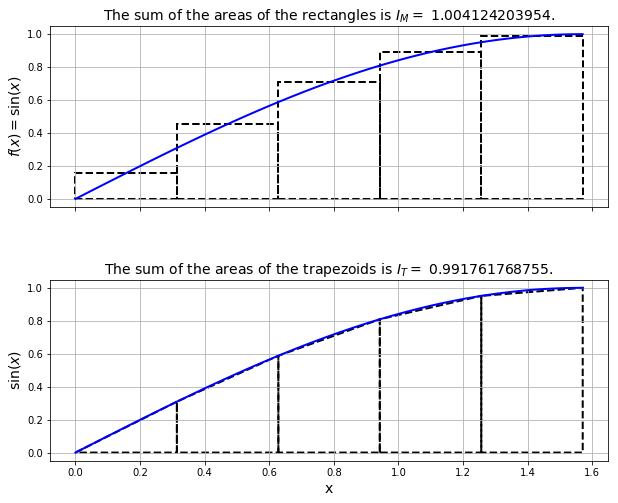

In [78]:
# Get the value of pi from numpy and generate equally spaced values from 0 to pi.
x = np.linspace(0, np.pi/2, 100)
y = f(x)

# plot
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True, sharey=True)
ax1 = axes[0]
ax1.plot(x, y, 'b', lw=2)

# Label axis.
ax1.set_ylabel('$f(x)=\sin(x)$', fontsize=14)
ax1.set_title('Approximating a function with rectangles', fontsize=14)

# Overlay a grid.
ax1.grid(True)

number_intervals = 5
xi = np.linspace(0, np.pi/2, number_intervals+1)
I_M = 0.0
for i in range(number_intervals):
    ax1.add_patch(Rectangle((xi[i], 0.0), (xi[i+1] - xi[i]),
                            f((xi[i+1]+xi[i])/2), fill=False, ls='--', color='k', lw=2))
    I_M += f((xi[i+1]+xi[i])/2)*(xi[i+1] - xi[i])
    
ax1.set_title('The sum of the areas of the rectangles is $I_M =$ {:.12f}.'.format(I_M),
              fontsize=14)

# plot
ax2 = axes[1]
ax2.plot(x, y, 'b', lw=2)

# Label axis.
ax2.set_xlabel('x', fontsize=14)
ax2.set_ylabel('$\sin(x)$', fontsize=14)
ax2.set_title('Approximating function with trapezoids', fontsize=14)

# Overlay a grid.
ax2.grid(True)

number_intervals = 5
xi = np.linspace(0, np.pi/2, number_intervals+1)
I_T = 0.0
for i in range(number_intervals):
    ax2.add_patch(Polygon(np.array([[xi[i], 0], [xi[i], f(xi[i])], [
                  xi[i+1], f(xi[i+1])], [xi[i+1], 0]]), closed=True, fill=False, ls='--', color='k', lw=2))
    I_T += ((f(xi[i+1]) + f(xi[i]))/2)*(xi[i+1] - xi[i])

ax2.set_title('The sum of the areas of the trapezoids is $I_T =$ {:.12f}.'.format(I_T),
              fontsize=14)
    

plt.subplots_adjust(hspace=0.4)

glue("concave_fig", fig, display=False)

plt.show()

```{margin}
<img src="images_nm1/SIMPSONS.png">
```
## Simpson's rule

For our half sine wave, the rectangle method overestimates it by about 0.4%, while the trapezoid method underestimates it for 0.9%. We notice that in this situation, the rectangle method overestimates while the trapezoid method underestimates about twice the overestimate of the rectangle method. Could we combine this to obtain something more accurate?

Knowing the error estimates from the two rules explored so far opens up the potential for us to combine them in an appropriate manner to create a new quadrature rule, generally more accurate than either one separately. 

Suppose \\(I_S\\) indicates an unknown, but more accurate, estimate of the integral over an interval. Then, as seen above, as \\(I_T\\) has an error that is approximately \\(-2\\) times the error in \\(I_M\\), the following relation must hold approximately:

\\[I_S - I_T \approx -2 \left ( I_S - I_M\right ).\\]

This follows from the fact that \\(I - I_T \approx -2 \left ( I - I_M\right )\\), provided that \\(I_S\\) is closer to \\(I\\) than either of the other two estimates. Replacing this approximately equals sign with actual equality defines \\(I_S\\) for us in terms of things we know. 

We can rearrange this to give an expression for \\(I_S\\) that yields a more accurate estimate of the integral than either \\(I_M\\) or \\(I_T\\):

\\[I_S := \frac{2}{3}I_M + \frac{1}{3}I_T.\\]

We combined twice the overestimate from the rectangle method and once the underestimate from the trapezoid method, and then divided everything by 3 to obtain something more accurate! What we're doing here is using the fact that we know something about (the *leading order* behaviour of the) two errors, and we can therefore combine them to cancel this error to a certain extent.

This estimate will generally be more accurate than either \\(M\\) or \\(T\\) alone. The error won't be zero in general as we're only cancelling out the leading order term in the error, but a consequence is that we will be left with higher-degree terms in the error expansion of the new quadrature rule which should be smaller (at least in the asymptotic limit), and converge faster. 

The resulting quadrature method in this case is known as [**Simpson's rule**](http://en.wikipedia.org/wiki/Simpson%27s_rule). Let's expand the Simpsons rule by substituting in what we know about the rectangle rule and the trapezoid rule:

$$
\begin{align*}
I_S &:= \frac{2}{3}I_M + \frac{1}{3}I_T \\[5pt]
&= \frac{2}{3}  (b-a)f\left ( \frac{a+b}{2}\right ) + \frac{1}{3}(b-a)\frac{(f(a) + f(b))}{2} \\[5pt]
& = \frac{(b-a)}{6}\left( f \left ( a\right ) + 4f \left ( c\right ) + f\left ( b\right )\right),
\end{align*}
$$

where \\(a\\) and \\(b\\) are the end points of an interval and \\(c = \left ( a+b\right )/2\\) is the midpoint.


Note that an alternate derivation of the same rule involves fitting a *quadratic function* (i.e. \\(P_2(x)\\) rather than the constant and linear approximations already considered) that interpolates the integral at the two end points of the interval, \\(a\\) and \\(b\\), as well as at the midpoint, \\(c = \left ( a+b\right )/2\\), and calculating the integral under that polynomial approximation.

Let's plot what this method is doing and compute the integral for our sine case.

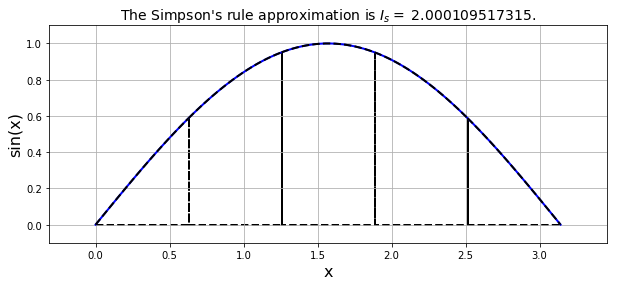

In [79]:
# Get the value of pi from numpy and generate equally spaced values from 0 to pi.
x = np.linspace(0, np.pi, 100)
y = f(x)

# plot
fig = plt.figure(figsize=(10, 4))
ax1 = plt.subplot(111)
ax1.plot(x, y, 'b', lw=2)

ax1.margins(0.1)

# Label axis.
ax1.set_xlabel('x', fontsize=16)
ax1.set_ylabel('sin(x)', fontsize=16)

# Overlay a grid.
ax1.grid(True)

number_intervals = 5
xi = np.linspace(0, np.pi, number_intervals+1)

I_S = 0.0

for i in range(number_intervals):
    # Use a non-closed Polygon to visualise the straight sides of each interval 
    ax1.add_patch(Polygon(np.array([[xi[i], f(xi[i])], [xi[i], 0], [xi[i+1], 0], [xi[i+1], f(xi[i+1])]]),
                          closed=False, fill=False, ls='--', color='k', lw=2))
    # Add the quadratic top - fit a quadratic using numpy
    poly_coeff = np.polyfit((xi[i], (xi[i] + xi[i+1])/2.0, xi[i + 1]),
                            (f(xi[i]), f((xi[i] + xi[i+1])/2.0), f(xi[i+1])), 2)
    # Plot the quadratic using 20 plotting points within the interval 
    ax1.plot(np.linspace(xi[i], xi[i+1], 20),
             f(np.linspace(xi[i], xi[i+1], 20)), ls='--', color='k', lw=2)
    # qdd in the area of the interval shape to our running total using Simpson's formula
    I_S += ((xi[i+1] - xi[i])/6.) * (f(xi[i]) + 4 *
                                     f((xi[i] + xi[i+1])/2.0) + f(xi[i+1]))

ax1.set_title("The Simpson's rule approximation is $I_s =$ {:.12f}.".format(I_S),
              fontsize=14)
    
plt.show()

It looks much closer to the actual function:
    
<p style="text-align:center;"><img src="http://upload.wikimedia.org/wikipedia/commons/5/50/Integration_simpson.png" width="600px"></p>

Let's make a function to test it out.

In [80]:
def simpsons_rule(a, b, function, number_intervals=10):
    """ Function to evaluate Simpson's rule. 
    
    Note that this implementation takes the function as an argument, 
    and evaluates this at the midpoint of subintervals in addition to the 
    end point. Hence additional information is generated and used through 
    additional function evaluations. 
    
    This is different to the function/implementation available with SciPy  
    where discrete data only is passed to the function. 
    
    Bear this in mind when comparing results - there will be a factor of two
    in the definition of "n" we need to be careful about!
    
    Also note that this version of the function performs redundant function 
    evaluations - see the **composite** implementation below.
    """

    interval_size = (b - a)/number_intervals

    assert interval_size > 0
    assert type(number_intervals) == int

    I_S = 0.0

    # Loop to valuate Simpson's formula over each interval 
    for i in range(number_intervals):
        # Find a, c, and b
        this_bin_start = a + interval_size * (i)
        this_bin_mid = this_bin_start + interval_size/2
        this_bin_end = this_bin_start + interval_size
        # Calculate the rule and add to running total.
        I_S += (interval_size/6) * (function(this_bin_start) +
                                  4 * function(this_bin_mid) + function(this_bin_end))

    # Return our running total result
    return I_S

Let's test the function:

In [81]:
print("The area found by direct integration = 2")
for i in (1, 2, 10, 100, 1000):
    area = simpsons_rule(0, np.pi, np.sin, i)
    print("Area %g Simpson's interval(s) = %g (error=%g)"%(i, area, abs(area-2)))

The area found by direct integration = 2
Area 1 Simpson's interval(s) = 2.0944 (error=0.0943951)
Area 2 Simpson's interval(s) = 2.00456 (error=0.00455975)
Area 10 Simpson's interval(s) = 2.00001 (error=6.78444e-06)
Area 100 Simpson's interval(s) = 2 (error=6.76471e-10)
Area 1000 Simpson's interval(s) = 2 (error=6.79456e-14)


For this simple function you should find far smaller errors, and which drop much more rapidly with smaller \\(h\\) (or more sub-intervals).

**Observations:**

- The errors are lower than for the midpoint and trapezoidal rules, and the method converges more rapidly - i.e. the relative improvement only gets better for more subintervals.

- This expression now integrates up to cubics exactly (by construction), so it is of order 4 (if we halve the interval size, the error goes by a factor of \\(2^4=16\\)).

    The convergence can be confirmed in the plot below:

    ```{glue:} simpson_conv_fig
    ```
- The degree of accuracy or precision of this method is 3.

- Simpson's rule integrates to cubics exactly, so since it's integrating exactly, cubics cannot contribute to the error. Only the quartic (4th) order terms contribute to the error, so it's 4th order accurate.

- We're getting down to errors close to the machine precision now when we use 1000 subintervals. Remember: your average consumer grade hardware can only handle that many decimal points, and you will need some rather expensive hardware to have even higher levels of precisions. Continuing with 1000 subintervals is actually not helpful as the error that you will get stops decreasing as it is so small that your computer stops being able to discriminate it from 0. Remember we may well either have a relatively small number of data points, or want to minimise the number of function evaluations well below this relatively high number. This will mean that for problems with lots of variation, and/or in higher dimensions, that we still work to do in improving our quadrature methods.

- As was the case with our first trapezoidal implementation, we are performing unnecessary function evaluations here; we can fix this issue through the implementation of a so-called *composite* version of the rule, which still gives the same result as your Simpson's rule, but makes it but easier for the computer. The composite Simpson's rule still does many evaluations, but fewer evaluations than your standard Simpson's rule. 

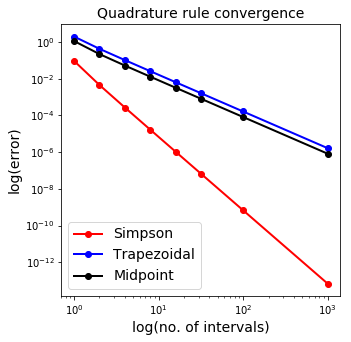

In [82]:
# Now let's test the Simpson's rule function.
#print("The exact area found by direct integration = 2")
interval_sizes_S = [1, 2, 4, 8, 16, 32, 100, 1000]
errors_S = np.zeros_like(interval_sizes_S, dtype='float64')
areas_S = np.zeros_like(interval_sizes_S, dtype='float64')
for (i, number_intervals) in enumerate(interval_sizes_S):
    areas_S[i] = simpsons_rule(0, np.pi, f, number_intervals)
    errors_S[i] = abs(areas_S[i] - 2)
    #print('Area {:<4d} for Simpson = {:.16f} (error = {:.9e})'.format(
    #    number_intervals, areas_S[i], errors_S[i]))
    
    
#print('\nVerificaton check: These are the corresponding values computed using SciPy' 
#      '  (BUT read the comment in the code above!)')
# note that since our function above takes the function and can evaluate it wherever it likes, 
# it essentially doubles the number of intervals by evaluating the function at the mid points.
# The scipy function takes in discrete data points, and hence fits a polynomial across two
# intervals. 
# Therefore to get the same values we need to explicitly double the number of intervals in the
# function call: 
# instead of passing it 'number_intervals' points, we pass it '2*number_intervals + 1' points
# Also the SciPy implementation obviously needs an even number of intervals (equivalently an ODD
# number of data points)
# Note we didn't have this issue with the SciPy version of trapezoidal as both the function and
# data point passing versions of the method only need two (end) points per interval.
for (i, number_intervals) in enumerate(interval_sizes_S):
    area_scipy_simpson = si.simps(f(np.linspace(0, np.pi, 2*number_intervals + 1)),
                   np.linspace(0, np.pi, 2*number_intervals + 1))
    #print('{0:.16f}, {1:.16e}'.format(area_scipy_simpson, abs(area_scipy_simpson - areas_S[i])))
    

# plot
fig = plt.figure(figsize=(5, 5))
ax1 = plt.subplot(111)
ax1.loglog(interval_sizes_S, errors_S, 'ro-', lw=2, label='Simpson')
ax1.loglog(interval_sizes_T, errors_T, 'bo-', lw=2, label='Trapezoidal')
ax1.loglog(interval_sizes_M, errors_M, 'ko-', lw=2, label='Midpoint')
ax1.set_xlabel('log(no. of intervals)', fontsize=14)
ax1.set_ylabel('log(error)', fontsize=14)
ax1.set_title('Quadrature rule convergence', fontsize=14)
ax1.legend(loc='best', fontsize=14)

glue("simpson_conv_fig", fig, display=False)

plt.show()

## Composite Simpson's rule

If we assume that our interval \\([a,b]\\) has been split up into \\(n\\) intervals (or \\(n+1\\) data points) we can save some function evaluations by writing Simpson's rule in the following form:

$$
\begin{align*}
I_{S} 
& = \frac{\Delta x}{3}\left[ f \left ( x_0\right ) + 4f \left ( x_1\right ) + 2f\left ( x_2\right ) + 4f \left ( x_3\right ) + \cdots + 2 f \left ( x_{n-2}\right )  + 4 f \left ( x_{n-1}\right ) +  f \left ( x_{n}\right ) \right]\\[5pt]
& = \frac{\Delta x}{3}\left[ f \left ( x_0\right ) + 2\sum_{i=1}^{n/2 - 1} f\left(x_{2i}\right) + 4\sum_{i=1}^{n/2} f\left(x_{2i-1}\right)  +  f \left ( x_{n}\right ) \right].
\end{align*}
$$

This is known as the [composite Simpson's rule](http://en.wikipedia.org/wiki/Simpson%27s_rule#Composite_Simpson.27s_rule), 
or more precisely the *composite Simpson's 1/3 rule*.

You can find a version of Simpson's rule implemented by SciPy - [`scipy.interpolate.simps`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.simps.html).


Note that this way of formulating Simpson's rule (where we do not allow additional function evaluations at the midpoints of intervals - we assume we are only in a position to use the given data points) requires that \\(n\\) be even.

This way of writing the composite form in the case of \\(n=2\\) is equivalent to the formula over \\([a,b]\\) that introduced the additional midpoint location \\(c\\).

Let's implement this rule:

In [83]:
def simpsons_composite_rule(a, b, function, number_intervals=10):
    """Function to evaluate the composite Simpson's rule only using
    function evaluations at (number_intervals + 1) points.
    
    This implementation requires that the number of subintervals (number_intervals) be even
    """
    assert number_intervals % 2 == 0, "number_intervals is not even"

    interval_size = (b - a) / number_intervals
    # Start with the two end member values
    I_cS2 = function(a) + function(b)

    # Add in those terms with a coefficient of 4
    for i in range(1, number_intervals, 2):
        I_cS2 += 4 * function(a + i * interval_size)

    # And those terms with a coefficient of 2
    for i in range(2, number_intervals-1, 2):
        I_cS2 += 2 * function(a + i * interval_size)

    return I_cS2 * (interval_size / 3.0)

Let's test the rule:

In [84]:
print("The area found by direct integration = 2")
for i in (2, 10, 100, 1000):
    area = simpsons_composite_rule(0, np.pi, np.sin, i)
    print("Area %g rectangle(s) = %g (error=%g)"%(i, area, abs(area-2)))

The area found by direct integration = 2
Area 2 rectangle(s) = 2.0944 (error=0.0943951)
Area 10 rectangle(s) = 2.00011 (error=0.000109517)
Area 100 rectangle(s) = 2 (error=1.08245e-08)
Area 1000 rectangle(s) = 2 (error=1.07869e-12)


This is a slight improvement for a simple function like \\(\sin\\), but will be much more of an improvement for functions which oscillate more, in a relative sense compared to the size of our bins.

## Weddle's rule

We noted above that Simpson's rule is fourth-order accurate. Suppose we take an approximation to \\(I\\) using \\(n\\) subintervals with Simpson's rule and call the result \\(I_S\\), and then apply Simpson's rule with double the number of intervals (\\(2n\\)) and call the result \\(I_{S_2}\\). 

Then we have two estimates for the integral where we expect \\(I_{S_2}\\) to be approximately \\(2^4=16\\) times more accurate than \\(S\\). In particular, we expect the lowest (i.e. the leading) order error term in \\(I_{S_2}\\) to be precisely one sixteenth that of \\(I_S\\).

Similar to how we derived Simpson's rule by combining what we knew of the error for the midpoint and trapezoidal rules, with this knowledge we can combine the two estimates from Simpson's rule to derive an even more accurate estimate of \\(I\\).

Let's call this more accurate rule \\(I_W\\), which we can find by solving:

\\[I_W - I_S = 16 \left ( I_W - I_{S_2} \right ),\\]
for \\(I_W\\).

With a bit of manipulation,

$$\begin{align*}
&amp; \;\;\; I_W - I_S = 16 \left ( I_W - I_{S_2} \right ) \\[5pt]
\implies &amp; \;\;\; I_W - I_S = 16 I_W - 16 I_{S_2} \\[5pt]
\implies &amp; \;\;\; 15 I_W  = 16 I_{S_2} - I_S \\[5pt]
\implies &amp; \;\;\; 15 I_W  = 15 I_{S_2} + (I_{S_2} - I_S) ,
\end{align*}$$
we get this expression

\\[ I_W = I_{S_2} + \frac {\left (I_{S_2} - I_S \right )}{15}.\\]

This is known as **Weddle's rule**, or the extrapolated Simpson's rule because it uses two different values for the interval size and extrapolates from these two to obtain an even more accurate result.

Making a function for this rule is easy as we can just call our Simpson's rule functions with two values for the number of intervals.

### Implementation

We can implement this by calling already created functions for composite Simpson's rule:

In [85]:
def weddles_rule(a, b, function, number_intervals=10):
    """ Function to evaluate Weddle's quadrature rule using
    appropriate calls to the composite_simpson function
    """
    S = simpsons_composite_rule(a, b, function, number_intervals)
    S2 = simpsons_composite_rule(a, b, function, number_intervals*2)

    return S2 + (S2 - S)/15.

We can test it in a similar way:

In [87]:
for i in (2, 10, 100, 1000):
    area = weddles_rule(0, np.pi, np.sin, i)
    print("Area with %g Weddle's interval(s) = %g (error=%g)"%(i, area, abs(area-2)))

Area with 2 Weddle's interval(s) = 1.99857 (error=0.00142927)
Area with 10 Weddle's interval(s) = 2 (error=6.44164e-08)
Area with 100 Weddle's interval(s) = 2 (error=6.23945e-14)
Area with 1000 Weddle's interval(s) = 2 (error=8.88178e-16)


Our final result is much more accurate for fewer required bins:

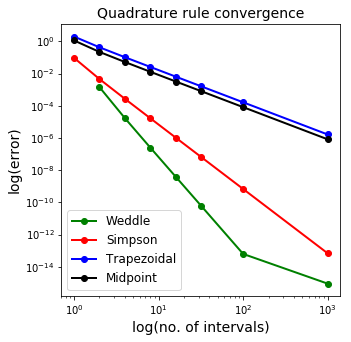

In [90]:
# Now let's test the Weddle's rule function.
#print("The exact area found by direct integration = 2")
interval_sizes_W = [2, 4, 8, 16, 32, 100, 1000]
errors_W = np.zeros_like(interval_sizes_W, dtype='float64')
for (i, number_intervals) in enumerate(interval_sizes_W):
    area = weddles_rule(0, np.pi, f, number_intervals)
    errors_W[i] = abs(area-2)
    #print('Area {0:<4d} interval(s), {1:<4d} function evaluations for Weddle = {2:.16f} (error = {3:.16e})'.format(
    #    number_intervals, ((number_intervals+1)+(2*number_intervals+1)), area, errors_W[i]))

# plot
fig = plt.figure(figsize=(5, 5))
ax1 = plt.subplot(111)
ax1.loglog(interval_sizes_W, errors_W, 'go-', lw=2, label='Weddle')
# need to run the other quadrature rules to allow the following 3 lines
ax1.loglog(interval_sizes_S, errors_S, 'ro-', lw=2, label='Simpson')
ax1.loglog(interval_sizes_T, errors_T, 'bo-', lw=2, label='Trapezoidal')
ax1.loglog(interval_sizes_M, errors_M, 'ko-', lw=2, label='Midpoint')
ax1.set_xlabel('log(no. of intervals)', fontsize=14)
ax1.set_ylabel('log(error)', fontsize=14)
ax1.set_title('Quadrature rule convergence', fontsize=14)
ax1.legend(loc='best', fontsize=12)

plt.show()

## Other rules

Note that the above technique of using the same rule, but with different values for the interval size, \\(h\\), to derive a more accurate estimate of the integral is an example of what is more generally called *Richardson extrapolation*. Performing this approach using the trapezoid rule as the starting point leads to what is termed *Romberg integration*.

Taking the idea behind Simpson's rule which fits a quadratic Lagrange interpolating polynomial to *equally spaced* points in the interval, end extending to any order Lagrange polynomial leads to the [*Newton-Cotes* family of quadrature rules](https://en.wikipedia.org/wiki/Newton%E2%80%93Cotes_formulas).

Note finally, that even wider families exist where the function being integrated is evaluated at non-equally-spaced points. And of course for practical application these ideas need to be extended to more than one dimension.